# Kenyaita Hodge IBS 574 Python Homework 3


#### Add your name and the date your notebook was last updated

In [1]:
%load_ext watermark
%watermark -a "Kenyaita Hodge" -d -u -n -t -z

Kenyaita Hodge 
last updated: 2020-02-13 15:42:50 Eastern Standard Time


#### Load libraries

In [17]:
import pandas as pd
import numpy as np
from sinfo import sinfo
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
import matplotlib.pyplot as plt

#### Load data
note: include test for this chunk from previous homework

In [3]:
countdata = "https://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv"
counts = pd.read_csv(countdata, index_col = 0, sep = "\t")  
len(counts) == 14944

True

#### Perform Eigenvalue Decomposition

In [4]:
counts_transpose = counts.T
len(counts_transpose) == 14

True

In [5]:
group = ['Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case']
counts_transpose['group'] = group

In [6]:
features = pd.Series(counts_transpose.columns)[0:14944]

feature_arr = counts_transpose.loc[:, features].values

target_arr = counts_transpose.loc[:, ['group']].values

fitted_features = StandardScaler().fit_transform(feature_arr)

#### Determine Principal Components
note: include test for this chunk from previous homework

In [12]:
random.seed(44444)

pca = PCA(n_components = 2, random_state = 44444)

principalComponents = pca.fit_transform(fitted_features)

principalDataframe = pd.DataFrame(data = principalComponents, 
                                  columns = ['PC1', 'PC2'])
principalDataframe.index = counts_transpose.index
targetDataframe = counts_transpose[['group']]
newDataframe = pd.concat([principalDataframe, targetDataframe], axis=1)
principalDataframe["PC1"].max()== 126.5781511374742

newDataframe 

,PC1,PC2,group
T02,126.578151,22.172512,Control
T04,99.182056,1.424350,Control
T06,75.563747,-19.338757,Control
T08,50.782996,-40.197730,Control
T10,2.998503,-81.795995,Control
T12,-14.584119,-78.680747,Control
T14,-2.030800,-62.421594,Control
T01,-77.569590,-40.686478,Case
T03,-77.841672,-19.285563,Case
T05,-81.150428,-13.488447,Case


Graph the principal components by sample group

Text(0.5, 1, 'Homework 3')

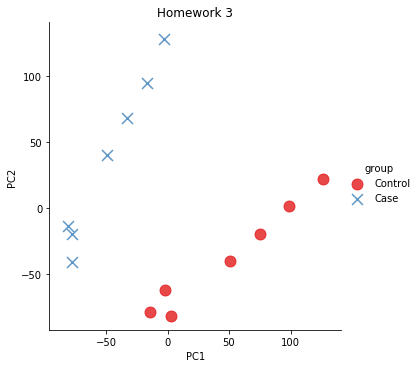

In [18]:
sns.lmplot( x="PC1", y="PC2",
          data=newDataframe,
           markers=["o", "x"],
          fit_reg=False,
          hue='group', # color by cluster
           palette="Set1",
          legend=True,
          scatter_kws={"s": 120}) # specify the point size
plt.title('Homework 3')

Interpret the graph for your principal investigator

In [ ]:
pca.explained_variance_ratio_

# Approximately 39% of the variability between these groups is explained by a sample being either a case or a control.
# Approximately 37% can be attributed to another variable unaccounted for in the experimental design.

#### Report Session Information


In [ ]:
sinfo